In [17]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.ticker as mticker
import time
import matplotlib.pyplot as plt
from tsf_dataloader import convert_tsf_to_dataframe
from IPython.display import display
import datetime


In [ ]:
# Traffic weekly dataset
fn = "../data/time_series_datasets/traffic_weekly_dataset.tsf"
df = convert_tsf_to_dataframe(fn)[0]
display(df)

,series_name,start_timestamp,series_value
0,T1,2015-01-01,"[6.4875, 7.8092, 6.8881, 7.1613, 8.3065, 7.722..."
1,T2,2015-01-01,"[4.9411, 8.6152, 7.6686, 7.1855, 7.8206, 8.249..."
2,T3,2015-01-01,"[12.3069, 15.2114, 14.4405, 12.1928, 15.6418, ..."
3,T4,2015-01-01,"[5.8247, 9.1474, 8.7523, 8.0671, 8.7217, 9.271..."
4,T5,2015-01-01,"[3.1196, 4.1974, 3.7039, 3.9927, 4.4377, 4.439..."
...,...,...,...
857,T858,2015-01-01,"[3.8899, 3.8899, 3.8899, 3.8899, 3.8899, 3.889..."
858,T859,2015-01-01,"[7.4966, 7.8621, 7.4684, 6.9016, 7.6305, 7.942..."
859,T860,2015-01-01,"[3.8899, 3.8899, 3.8899, 3.8899, 3.8899, 3.889..."
860,T861,2015-01-01,"[3.491, 4.0003, 3.4267, 3.7289, 3.7914, 3.86, ..."


In [ ]:
timeseries = list(df["series_value"].apply(lambda x: list(x)))
timeseries = np.array(timeseries)

# setting up an array of timestamps
start_time = df['start_timestamp'][0]
start_timestamp = time.mktime(start_time.timetuple())
time_interval = 60*60*24*7 # weekly
timeseries_len = timeseries.shape[1]
timestamp_arr = np.arange(int(start_timestamp), int(start_timestamp)+time_interval*timeseries_len, time_interval)
time_arr = np.array([datetime.datetime.utcfromtimestamp(int(float(timestamp))).strftime('%Y-%m-%d') for timestamp in timestamp_arr])

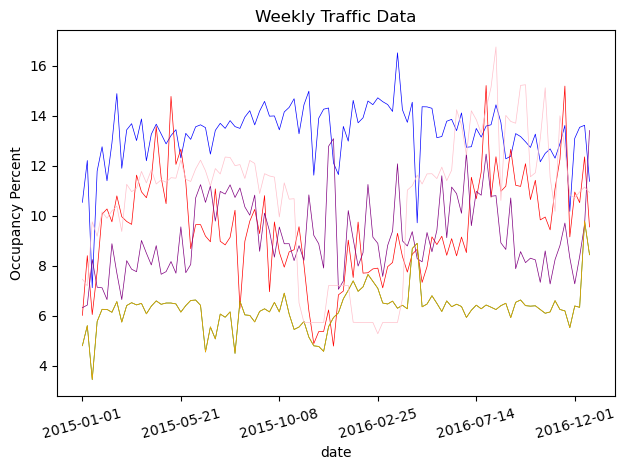

In [ ]:
scale = 1

# make figure + axes
fig, ax = plt.subplots(tight_layout=True)
plt.title("Weekly Traffic Data")
ax.set_xlabel('date')
ax.set_ylabel(f'Occupancy Percent')

rand_ind = np.random.randint(0, timeseries.shape[0], 6)
# draw one line
ln1, = ax.plot(timeseries[rand_ind[0]]/scale, c='blue', lw=0.5)
ln2, = ax.plot(timeseries[rand_ind[1]]/scale, c='red', lw=0.5)
ln3, = ax.plot(timeseries[rand_ind[2]]/scale, c='green', lw=0.5)
ln4, = ax.plot(timeseries[rand_ind[3]]/scale, c='purple', lw=0.5)
ln5, = ax.plot(timeseries[rand_ind[4]]/scale, c='orange', lw=0.5)
ln6, = ax.plot(timeseries[rand_ind[5]]/scale, c='pink', lw=0.5)

# helper function for the formatter
def listifed_formatter(x, pos=None):
    try:
        return time_arr[int(x)]
    except IndexError:
        return ''

# make and use the formatter
mt = mticker.FuncFormatter(listifed_formatter)
ax.xaxis.set_major_formatter(mt)

# set the default ticker to only put ticks on the integers
loc = ax.xaxis.get_major_locator()
loc.set_params(integer=True)

# rotate the labels
[lab.set_rotation(15) for lab in ax.get_xticklabels()]
plt.show()